**Problem 1:**

In [3]:
import pandas as pd
import numpy as np

In [5]:
df1=pd.read_csv('/content/athlete_events.csv')
df2=pd.read_csv('/content/noc_regions.csv')

In [6]:
df1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
df2.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [8]:
df2.region.value_counts()

Germany           4
Russia            3
Serbia            3
Czech Republic    3
Malaysia          3
                 ..
Chad              1
Belize            1
Grenada           1
Timor-Leste       1
Algeria           1
Name: region, Length: 206, dtype: int64

In [10]:
df1.shape,df2.shape

((271116, 15), (230, 3))

In [12]:
df1.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [13]:
df2.isnull().sum()

NOC         0
region      3
notes     209
dtype: int64

1. Handle null values in dataset and remove unwanted symbols if any

In [14]:
df1['Age'] = df1['Age'].fillna(df1['Age'].mean())
df1['Height'] = df1['Height'].fillna(df1['Height'].mean())
df1['Weight'] = df1['Weight'].fillna(df1['Weight'].mean())
df1['Medal'] = df1['Medal'].fillna('unknown')

In [15]:
df1['Age'].mean(), df1['Height'].mean(), df1['Weight'].mean()

(25.55689835729893, 175.3389698736043, 70.70239290055207)

In [16]:
df1.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

2. What is the unique count of sports, events, and different city, and the team participated
in the Olympics.



In [17]:
df1[['Team','City','Sport','Event']].nunique()

Team     1184
City       42
Sport      66
Event     765
dtype: int64

3. What is the total count of players from the United States, China, Netherland, Spain,
France, Italy?

In [18]:
df1.Team.unique().tolist()

['China',
 'Denmark',
 'Denmark/Sweden',
 'Netherlands',
 'United States',
 'Finland',
 'Norway',
 'Romania',
 'Estonia',
 'France',
 'Taifun',
 'Morocco',
 'Spain',
 'Egypt',
 'Iran',
 'Bulgaria',
 'Italy',
 'Chad',
 'Azerbaijan',
 'Sudan',
 'Russia',
 'Argentina',
 'Cuba',
 'Belarus',
 'Greece',
 'Cameroon',
 'Turkey',
 'Chile',
 'Mexico',
 'Soviet Union',
 'Nicaragua',
 'Hungary',
 'Nigeria',
 'Algeria',
 'Kuwait',
 'Bahrain',
 'Pakistan',
 'Iraq',
 'United Arab Republic',
 'Lebanon',
 'Qatar',
 'Malaysia',
 'Germany',
 'Thessalonki-1',
 'Canada',
 'Ireland',
 'Australia',
 'South Africa',
 'Eritrea',
 'Tanzania',
 'Jordan',
 'Tunisia',
 'Libya',
 'Belgium',
 'Djibouti',
 'Palestine',
 'Comoros',
 'Kazakhstan',
 'Brunei',
 'India',
 'Saudi Arabia',
 'Syria',
 'Maldives',
 'Ethiopia',
 'United Arab Emirates',
 'North Yemen',
 'Indonesia',
 'Philippines',
 'Singapore',
 'Uzbekistan',
 'Kyrgyzstan',
 'Tajikistan',
 'Unified Team',
 'Japan',
 'Japan-1',
 'Congo (Brazzaville)',
 'Switzer

In [19]:
print('count of players from China :',df1.Team.value_counts().China)
print('count of players from Netherlands :',df1.Team.value_counts().Netherlands)
print('count of players from Spain :',df1.Team.value_counts().Spain)
print('count of players from France :',df1.Team.value_counts().France)
print('count of player from USA:' , df1.NOC.value_counts().USA)
print('count of players from Italy:', df1.Team.value_counts().Italy)

count of players from China : 4975
count of players from Netherlands : 5718
count of players from Spain : 5224
count of players from France : 11988
count of player from USA: 18853
count of players from Italy: 10260


4. What is the average age of female and male players from the United States, China,
Netherland, Spain, France, Italy


In [20]:
data = df1.loc[(df1['Team'] == 'United States') | (df1['Team'] == 'China') | (df1['Team'] == 'Netherlands')
 | (df1['Team'] == 'Spain') | (df1['Team'] == 'France') | (df1['Team'] == 'Italy')]

In [21]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,unknown
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,unknown
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,unknown
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",unknown
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,unknown


In [22]:
data.groupby(['Sex'])['Age'].mean()

Sex
F    23.789058
M    26.590627
Name: Age, dtype: float64

5. What are the different kinds of sports in which players have participated in different
cities of the United States.


In [23]:
df1[df1['NOC'] == 'USA']['Sport'].unique().tolist()

['Cross Country Skiing',
 'Wrestling',
 'Athletics',
 'Figure Skating',
 'Cycling',
 'Golf',
 'Softball',
 'Taekwondo',
 'Rowing',
 'Basketball',
 'Synchronized Swimming',
 'Ice Hockey',
 'Baseball',
 'Handball',
 'Weightlifting',
 'Fencing',
 'Swimming',
 'Shooting',
 'Archery',
 'Sailing',
 'Volleyball',
 'Art Competitions',
 'Alpine Skiing',
 'Boxing',
 'Football',
 'Tennis',
 'Judo',
 'Snowboarding',
 'Nordic Combined',
 'Trampolining',
 'Biathlon',
 'Ski Jumping',
 'Freestyle Skiing',
 'Bobsleigh',
 'Diving',
 'Modern Pentathlon',
 'Equestrianism',
 'Gymnastics',
 'Polo',
 'Short Track Speed Skating',
 'Hockey',
 'Water Polo',
 'Canoeing',
 'Skeleton',
 'Speed Skating',
 'Badminton',
 'Rugby Sevens',
 'Table Tennis',
 'Curling',
 'Luge',
 'Triathlon',
 'Rhythmic Gymnastics',
 'Beach Volleyball',
 'Tug-Of-War',
 'Roque',
 'Rugby',
 'Lacrosse',
 'Jeu De Paume']

6. What are the names of players who have brought gold, silver and bronze medal?

In [24]:
medals = df1.loc[(df1['Medal'] == 'Gold') | (df1['Medal'] == 'Silver') | (df1['Medal'] == 'Bronze')]

In [25]:
df1['Name'].unique().tolist()

['A Dijiang',
 'A Lamusi',
 'Gunnar Nielsen Aaby',
 'Edgar Lindenau Aabye',
 'Christine Jacoba Aaftink',
 'Per Knut Aaland',
 'John Aalberg',
 'Cornelia "Cor" Aalten (-Strannood)',
 'Antti Sami Aalto',
 'Einar Ferdinand "Einari" Aalto',
 'Jorma Ilmari Aalto',
 'Jyri Tapani Aalto',
 'Minna Maarit Aalto',
 'Pirjo Hannele Aalto (Mattila-)',
 'Arvo Ossian Aaltonen',
 'Juhamatti Tapio Aaltonen',
 'Paavo Johannes Aaltonen',
 'Timo Antero Aaltonen',
 'Win Valdemar Aaltonen',
 'Kjetil Andr Aamodt',
 'Ragnhild Margrethe Aamodt',
 'Andreea Aanei',
 'Fritz Aanes',
 'Nils Egil Aaness',
 'Alf Lied Aanning',
 'Agnes Erika Aanonsen (-Eyde)',
 'Johan Aantjes',
 'Jan-Erik Aarberg',
 'Willemien Aardenburg',
 'Pepijn Aardewijn',
 'Evald rma (rman-)',
 'Olav Augunson Aarnes',
 'Mika Lauri Aarnikka',
 'Jamale (Djamel-) Aarrass (Ahrass-)',
 'Dagfinn Sverre Aarskog',
 'Stefan Remco Aartsen',
 'Ann Kristin Aarnes',
 'Karl Jan Aas',
 'Lars Thorlaksn Aas',
 'Roald Edgar Aas',
 'Rolf Aas',
 'Thomas Valentin Aas'

7. Which team has brought the most number of female and male players?

In [26]:
df1.groupby(['Team'])['Sex'].count().sort_values(ascending=False)

Team
United States     17847
France            11988
Great Britain     11404
Italy             10260
Germany            9326
                  ...  
Formosa               1
Plume-patte-32        1
Pop Art               1
Satchmo               1
Souvenance            1
Name: Sex, Length: 1184, dtype: int64

8. Draw a suitable graph which depicts different events took place from 1900 to 2016.


Text(0, 0.5, 'No_of_Events')

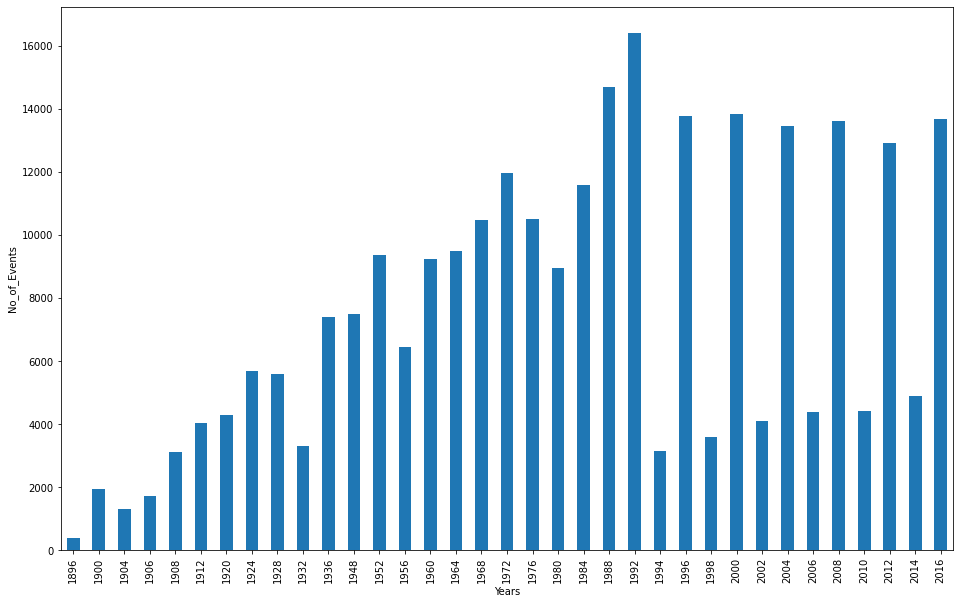

In [29]:
import matplotlib.pyplot as plt
df1.groupby(['Year'])['Event'].count().plot.bar(figsize=(16,10))
plt.xlabel('Years')
plt.ylabel('No_of_Events')

9. What are the different sports played in a different season?

In [30]:
df1.groupby('Season')['Sport'].unique().to_dict()

{'Summer': array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
        'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
        'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
        'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
        'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
        'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
        'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
        'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
        'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
        'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
        'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
        'Alpinism', 'Aeronautics'], dtype=object),
 'Winter': array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
        'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
        'Nordic Combined', 'F

10. What are the average height and weight of players who participated in football, Judo,
basketball?

In [31]:
h_w_avg = df1.loc[(df1['Sport'] == 'Football') | (df1['Sport'] == 'Judo') | (df1['Sport'] == 'Basketball')]

In [32]:
h_w_avg['Height'].mean(), h_w_avg['Weight'].mean()

(179.09535280344957, 76.14279907732836)

11. How many sports and events were player in 1992 winter, 1994 winter 2000 summer
2002 winter

In [33]:
winter1992 = df1.loc[(df1['Year'] == 1992)  & (df1['Season'] == 'Winter')]

In [34]:
winter1992[['Sport','Event']].nunique()

Sport    12
Event    57
dtype: int64

In [35]:
winter1994 = df1.loc[(df1['Year'] == 1994)  & (df1['Season'] == 'Winter')]

In [36]:

winter1994[['Sport','Event']].nunique()

Sport    12
Event    61
dtype: int64

In [37]:
summer2000 = df1.loc[(df1['Year'] == 2000)  & (df1['Season'] == 'Summer')]

In [38]:
summer2000[['Sport','Event']].nunique()

Sport     34
Event    300
dtype: int64

In [39]:
winter2002 = df1.loc[(df1['Year'] == 2002)  & (df1['Season'] == 'Winter')]

In [40]:
winter2002[['Sport','Event']].nunique()

Sport    15
Event    78
dtype: int64

13. What is the highest number of sports played in the year 1990, 1992, 1994, 2016?

In [41]:
df1[df1['Year'] == 1990]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


In [42]:
df1[df1['Year'] == 1992]['Sport'].value_counts()

Athletics                    2054
Swimming                     1615
Gymnastics                   1255
Alpine Skiing                 750
Cross Country Skiing          717
Rowing                        661
Canoeing                      587
Cycling                       566
Shooting                      564
Fencing                       458
Biathlon                      457
Sailing                       441
Judo                          433
Equestrianism                 404
Wrestling                     371
Speed Skating                 354
Boxing                        336
Hockey                        314
Handball                      292
Football                      272
Ice Hockey                    267
Tennis                        250
Table Tennis                  248
Archery                       247
Weightlifting                 244
Basketball                    236
Volleyball                    231
Badminton                     226
Bobsleigh                     216
Ski Jumping   

In [43]:

df1[df1['Year'] == 1994]['Sport'].value_counts()

Cross Country Skiing         639
Alpine Skiing                544
Biathlon                     416
Speed Skating                318
Ice Hockey                   268
Bobsleigh                    207
Short Track Speed Skating    188
Ski Jumping                  164
Figure Skating               130
Freestyle Skiing              99
Luge                          98
Nordic Combined               89
Name: Sport, dtype: int64

In [44]:
df1[df1['Year'] == 2016]['Sport'].value_counts()

Athletics                2508
Swimming                 1568
Gymnastics                861
Cycling                   667
Shooting                  555
Rowing                    550
Football                  473
Canoeing                  441
Hockey                    390
Judo                      389
Sailing                   380
Equestrianism             355
Handball                  353
Fencing                   346
Wrestling                 346
Rugby Sevens              299
Tennis                    286
Boxing                    283
Volleyball                283
Basketball                281
Water Polo                258
Weightlifting             255
Table Tennis              236
Archery                   200
Diving                    178
Badminton                 177
Taekwondo                 126
Golf                      120
Synchronized Swimming     118
Triathlon                 110
Rhythmic Gymnastics        96
Beach Volleyball           96
Modern Pentathlon          72
Trampolini

14. What are the different sports played by female players? In which sport, most numbers
of female players have participated. Visualize the same


In [45]:
Female_players = df1[(df1.Sex =='F')]

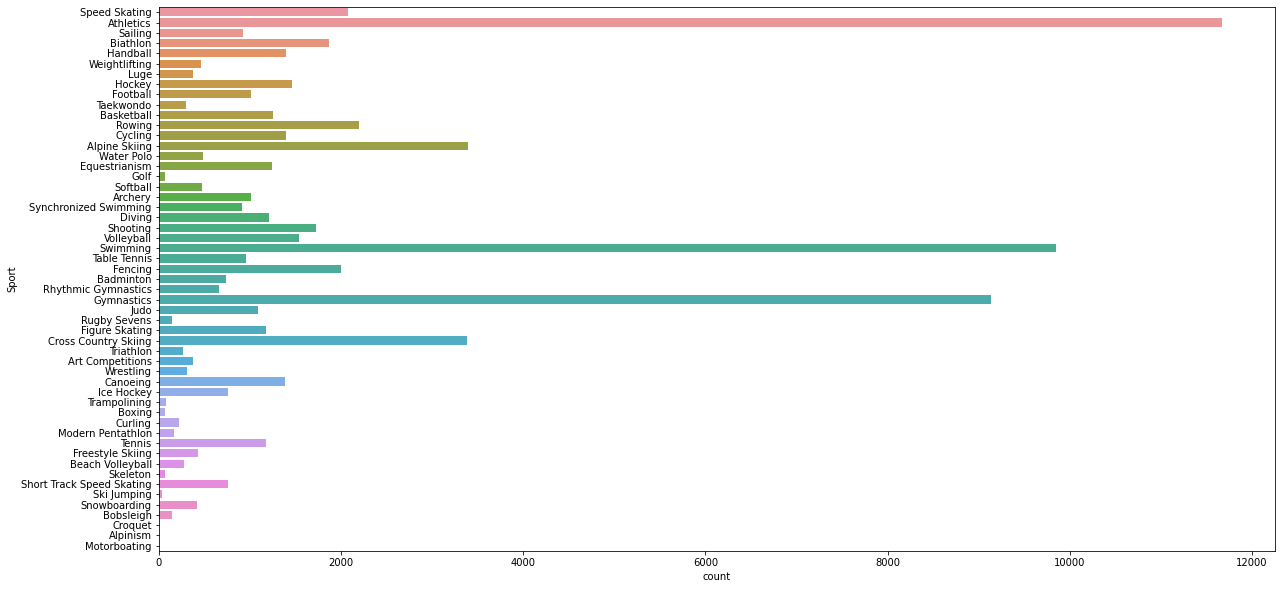

In [47]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.countplot(y= "Sport", data=Female_players)

15. Perform the above problem for male players as well.

In [48]:
male_players = df1[df1['Sex']=='M']

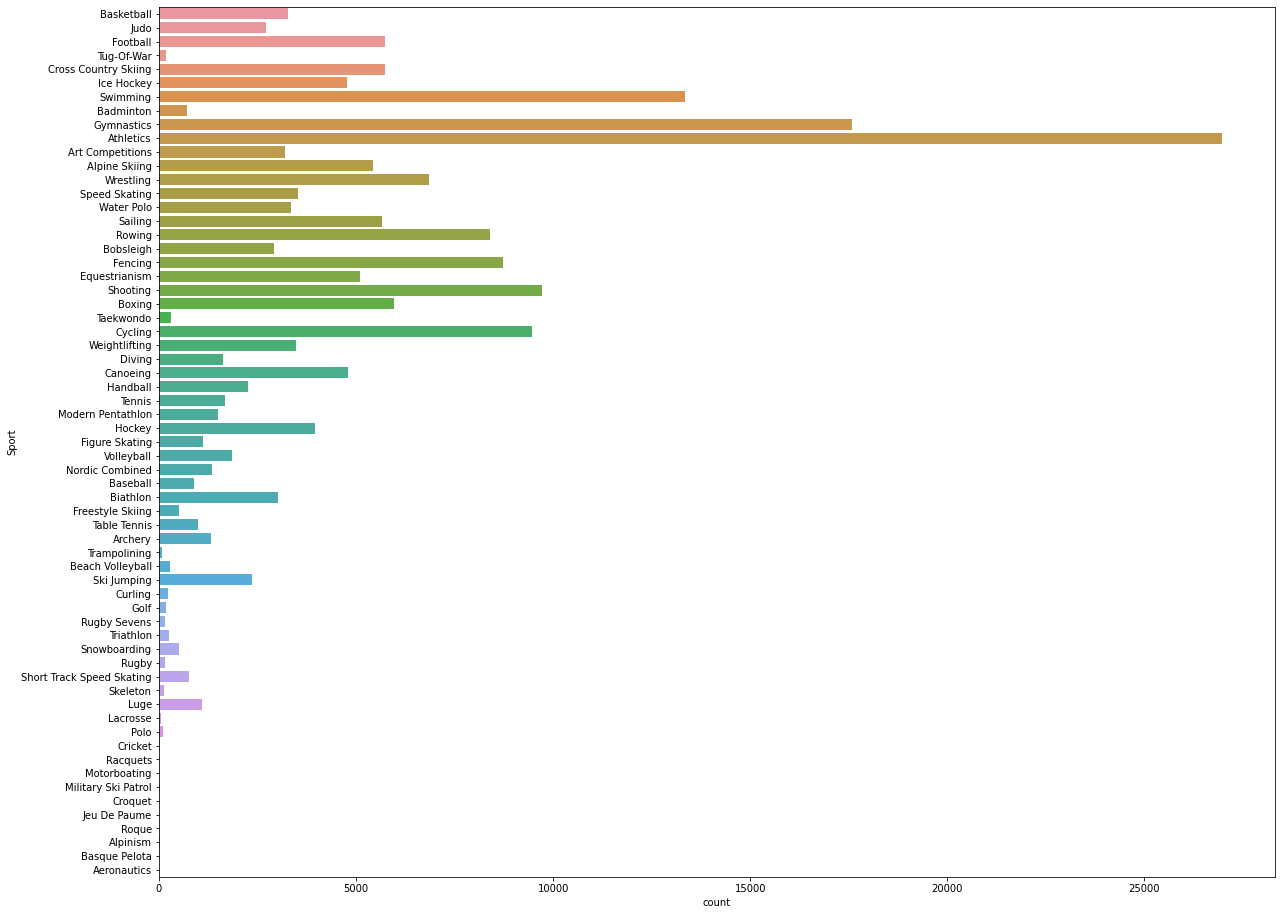

In [49]:

plt.figure(figsize=(20,16))
sns.countplot(y= "Sport", data=male_players)


16. Which city has the maximum number of players?

In [50]:
df1.groupby('City')['ID'].nunique().sort_values(ascending=False)

City
London                    16941
Athina                    11556
Rio de Janeiro            11179
Beijing                   10899
Sydney                    10647
Atlanta                   10339
Barcelona                  9386
Los Angeles                8720
Seoul                      8454
Munich                     7114
Montreal                   6073
Mexico City                5558
Roma                       5352
Moskva                     5259
Tokyo                      5137
Helsinki                   4932
Berlin                     4484
Paris                      4472
Amsterdam                  3247
Melbourne                  3189
Sochi                      2745
Antwerpen                  2676
Stockholm                  2567
Vancouver                  2536
Torino                     2494
Salt Lake City             2399
Innsbruck                  2210
Nagano                     2179
Albertville                1801
Lillehammer                1738
Calgary                    1425
Lak

17. Show line chart which tells variation in a number of players from 1990 to 2000 of India
and Pakistan. (Draw separate chart for India and Pakistan)

In [52]:
India = df1[df1['NOC'] == 'IND']
India

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
505,281,S. Abdul Hamid,M,25.556898,175.33897,70.702393,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,unknown
506,281,S. Abdul Hamid,M,25.556898,175.33897,70.702393,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,unknown
895,512,Shiny Kurisingal Abraham-Wilson,F,19.000000,167.00000,53.000000,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,unknown
896,512,Shiny Kurisingal Abraham-Wilson,F,19.000000,167.00000,53.000000,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,unknown
897,512,Shiny Kurisingal Abraham-Wilson,F,23.000000,167.00000,53.000000,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264139,132177,Mohammad Anas Yahiya,M,21.000000,177.00000,69.000000,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 400 metres Relay,unknown
265876,133029,"Thyadathuvilla Chandrapillai ""T. C."" Yohannan",M,29.000000,174.00000,62.000000,India,IND,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's Long Jump,unknown
266934,133554,Sayed Muhammad Yusuf,M,25.556898,175.33897,70.702393,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold
270912,135480,Geeta Zutshi,F,23.000000,167.00000,51.000000,India,IND,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Women's 800 metres,unknown


In [54]:
data = India.groupby('Year')['ID'].count().reset_index()
data

,Year,ID
0,1900,5
1,1920,7
2,1924,31
3,1928,24
4,1932,26
5,1936,30
6,1948,89
7,1952,94
8,1956,79
9,1960,49


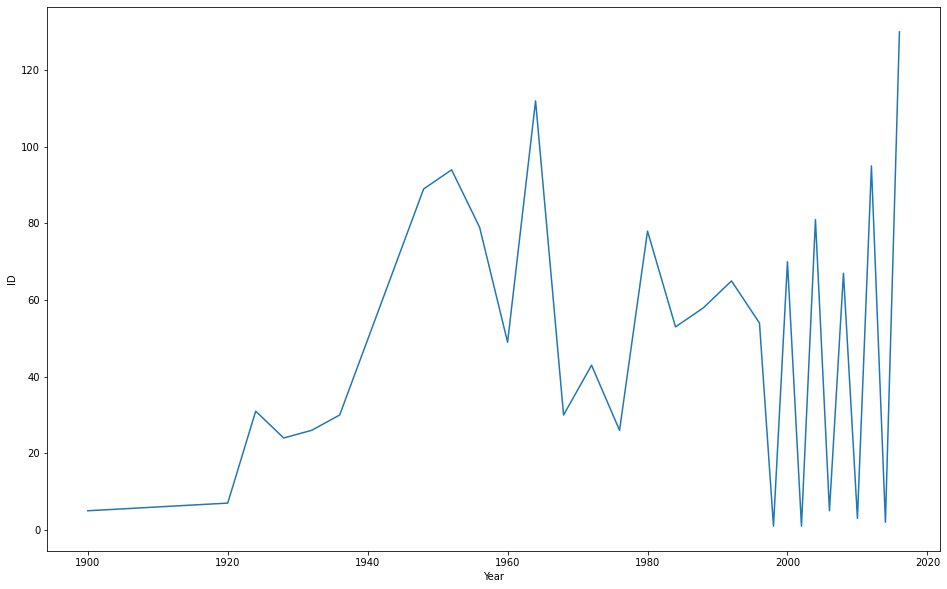

In [56]:
plt.figure(figsize=(16,10))
sns.lineplot(x='Year',y='ID', data=data)

In [58]:
Pakistan = df1[df1['NOC'] == 'PAK']
Pakistan

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
233,111,Aqarab Abbas,M,22.0,190.00000,88.000000,Pakistan,PAK,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's Hammer Throw,unknown
237,115,Ghulam Abbas,M,24.0,181.00000,74.000000,Pakistan,PAK,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's 400 metres Hurdles,unknown
245,121,Muhammad Abbas,M,23.0,168.00000,55.000000,Pakistan,PAK,2010 Winter,2010,Winter,Vancouver,Alpine Skiing,Alpine Skiing Men's Giant Slalom,unknown
247,123,Sohail Abbas,M,25.0,178.00000,80.000000,Pakistan,PAK,2000 Summer,2000,Summer,Sydney,Hockey,Hockey Men's Hockey,unknown
248,123,Sohail Abbas,M,29.0,178.00000,80.000000,Pakistan,PAK,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268234,134200,Aurang Zeb,M,29.0,175.33897,70.702393,Pakistan,PAK,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Men's 400 metres,unknown
268235,134200,Aurang Zeb,M,29.0,175.33897,70.702393,Pakistan,PAK,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Men's 4 x 400 metres Relay,unknown
269610,134907,Qamar Zia,M,22.0,168.00000,61.000000,Pakistan,PAK,1976 Summer,1976,Summer,Montreal,Hockey,Hockey Men's Hockey,Bronze
269611,134908,Qasim Zia,M,22.0,174.00000,71.000000,Pakistan,PAK,1984 Summer,1984,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold


In [60]:
data = Pakistan.groupby('Year')['ID'].count().reset_index()
data

,Year,ID
0,1948,44
1,1952,51
2,1956,79
3,1960,53
4,1964,47
5,1968,15
6,1972,26
7,1976,24
8,1984,33
9,1988,33


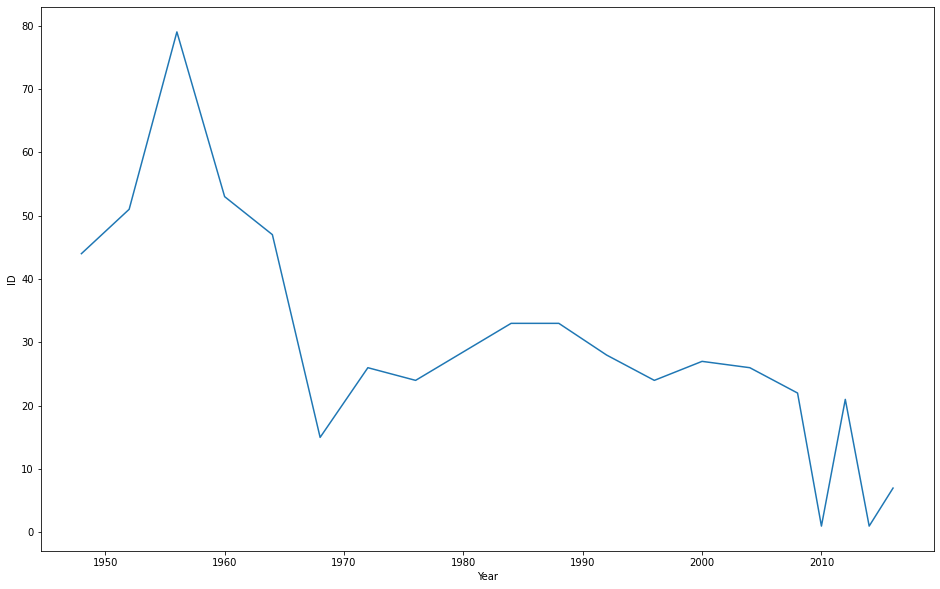

In [61]:
plt.figure(figsize=(16,10))
sns.lineplot(x='Year',y='ID', data=data)

18. Draw a pie chart to show the percentage of male and female players across the world


In [62]:
male_female = df1.groupby('Sex')['ID'].count().reset_index()
male_female

,Sex,ID
0,F,74522
1,M,196594


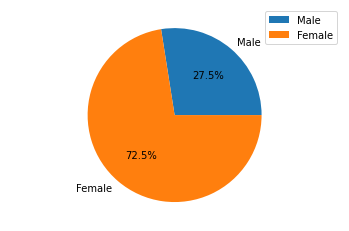

In [63]:
plt.axis("equal")
plt.pie(male_female['ID'], labels=['Male','Female'], autopct='%1.1f%%')
plt.legend()

19. Which team has won the maximum number of gold, silver and bronze? Visualize the
same.


In [64]:
df1.groupby(['Team'])['Medal'].nunique().sort_values(ascending=False)

Team
Spain           4
Australasia     4
Cameroon        4
Canada          4
Canada-1        4
               ..
North Borneo    1
Nortazo         1
Norna           1
Norman-1        1
30. Februar     1
Name: Medal, Length: 1184, dtype: int64

20. Who is the tallest and shortest player?

In [65]:
df1[df1['Height'] == df1['Height'].min()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
29333,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Individual All-Around,unknown
29334,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Team All-Around,unknown
29335,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Floor Exercise,unknown
29336,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Horse Vault,unknown
29337,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Uneven Bars,unknown
29338,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Balance Beam,unknown
164821,82769,Lyton Levison Mphande,M,25.0,127.0,62.0,Malawi,MAW,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Light-Welterweight,unknown


In [66]:
df1[df1['Height'] == df1['Height'].max()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
265040,132627,Yao Ming,M,20.0,226.0,141.0,China,CHN,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,unknown
265041,132627,Yao Ming,M,23.0,226.0,141.0,China,CHN,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,unknown
265042,132627,Yao Ming,M,27.0,226.0,141.0,China,CHN,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Men's Basketball,unknown


21. Draw a suitable chart which shows the performance of different cities belonging to
Beijing, London, Sydney, Los Angeles.

In [67]:
data = df1.loc[(df1['City'] == 'Beijing') | (df1['City'] == 'London') | (df1['City'] == 'Sydney') | (df1['City'] == 'Los Angeles')]

In [68]:
data = pd.get_dummies(columns=['Medal'],data=data)

In [69]:
data['Totalmedals'] = data['Medal_Bronze'] + data['Medal_Gold'] + data['Medal_Silver']

In [70]:
cities = data.groupby('City')['Totalmedals'].sum().reset_index()

In [71]:
cities

,City,Totalmedals
0,Beijing,2048.0
1,London,3624.0
2,Los Angeles,2123.0
3,Sydney,2004.0


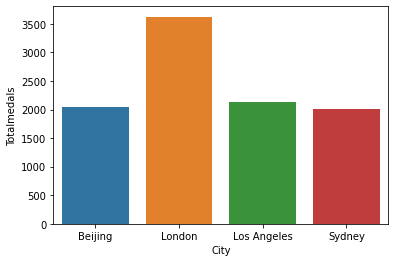

In [72]:
sns.barplot(x='City',y='Totalmedals',data=cities)

**Problem 2:**

1. Read Table1.xlsx and Table2.xlsx

In [74]:
table1=pd.read_excel('/content/Table1.xlsx')
table2=pd.read_excel('/content/Table2.xlsx')

In [75]:
table1.head()

,CustomerNum
0,17
1,20
2,5
3,28
4,15


In [76]:
table2.head()

,CustomerNum
0,84
1,85
2,72
3,100
4,65


2. Sort customer numbers in both Table1 and Table2 files in ascending order

In [77]:
table1.sort_values('CustomerNum', ascending=True,inplace=True,ignore_index=True)

In [78]:
table1.head()

,CustomerNum
0,1
1,2
2,3
3,4
4,5


In [79]:
table2.sort_values('CustomerNum',ascending=True,inplace=True,ignore_index=True)

table2.head()

,CustomerNum
0,51
1,52
2,53
3,54
4,55


3. Create a new Table3 combining both Table1 and Table2 by selecting the first 3 customers
from 
Table1 and first 4 customers from Table2. Repeat this process till we iterate on all customers
Your output should have 1 column and 100 rows with customer numbers.
Output – 1,2,3,51,52,53,54,4,5,6,55,56,57,58,7,8,9,59,60,61,62....

In [80]:
table3 = pd.concat([table1,table2],ignore_index=True)
table3

,CustomerNum
0,1
1,2
2,3
3,4
4,5
...,...
95,96
96,97
97,98
98,99


**Problem 3:**

1. Read the dataset and store it in a pandas data fram

In [82]:
sales = pd.read_csv('/content/company_sales_data.csv')
sales

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


2. Extract the product names into a list from the data frame


In [83]:
productnames = list(sales.columns)
productnames[1:]

['facecream',
 'facewash',
 'toothpaste',
 'bathingsoap',
 'shampoo',
 'moisturizer',
 'total_units',
 'total_profit']

3. Create a two-dimensional list of product names and sales

In [84]:
print(sales.T.reset_index().values.tolist())

[['month_number', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['facecream', 2500, 2630, 2140, 3400, 3600, 2760, 2980, 3700, 3540, 1990, 2340, 2900], ['facewash', 1500, 1200, 1340, 1130, 1740, 1555, 1120, 1400, 1780, 1890, 2100, 1760], ['toothpaste', 5200, 5100, 4550, 5870, 4560, 4890, 4780, 5860, 6100, 8300, 7300, 7400], ['bathingsoap', 9200, 6100, 9550, 8870, 7760, 7490, 8980, 9960, 8100, 10300, 13300, 14400], ['shampoo', 1200, 2100, 3550, 1870, 1560, 1890, 1780, 2860, 2100, 2300, 2400, 1800], ['moisturizer', 1500, 1200, 1340, 1130, 1740, 1555, 1120, 1400, 1780, 1890, 2100, 1760], ['total_units', 21100, 18330, 22470, 22270, 20960, 20140, 29550, 36140, 23400, 26670, 41280, 30020], ['total_profit', 211000, 183300, 224700, 222700, 209600, 201400, 295500, 361400, 234000, 266700, 412800, 300200]]


4. Create a dictionary of sold items

In [85]:
sales.to_dict(orient='list')


{'bathingsoap': [9200,
  6100,
  9550,
  8870,
  7760,
  7490,
  8980,
  9960,
  8100,
  10300,
  13300,
  14400],
 'facecream': [2500,
  2630,
  2140,
  3400,
  3600,
  2760,
  2980,
  3700,
  3540,
  1990,
  2340,
  2900],
 'facewash': [1500,
  1200,
  1340,
  1130,
  1740,
  1555,
  1120,
  1400,
  1780,
  1890,
  2100,
  1760],
 'moisturizer': [1500,
  1200,
  1340,
  1130,
  1740,
  1555,
  1120,
  1400,
  1780,
  1890,
  2100,
  1760],
 'month_number': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 'shampoo': [1200,
  2100,
  3550,
  1870,
  1560,
  1890,
  1780,
  2860,
  2100,
  2300,
  2400,
  1800],
 'toothpaste': [5200,
  5100,
  4550,
  5870,
  4560,
  4890,
  4780,
  5860,
  6100,
  8300,
  7300,
  7400],
 'total_profit': [211000,
  183300,
  224700,
  222700,
  209600,
  201400,
  295500,
  361400,
  234000,
  266700,
  412800,
  300200],
 'total_units': [21100,
  18330,
  22470,
  22270,
  20960,
  20140,
  29550,
  36140,
  23400,
  26670,
  41280,
  30020]}

5. What is the average profit of the company in a month


In [86]:
sales['total_profit'].mean()

260275.0

6. Get the most sold item of the company

In [87]:
for i in sales.drop(['month_number','total_units','total_profit'],axis=1):
   print(i,sales[i].sum())

facecream 34480
facewash 18515
toothpaste 69910
bathingsoap 114010
shampoo 25410
moisturizer 18515


7. Read Total profit of all months and show it using a line plot

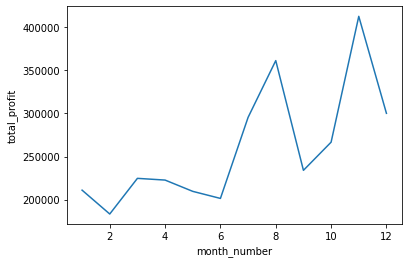

In [88]:
sns.lineplot(x='month_number', y='total_profit',data=sales)

8. Read all product sales data and show it using a Multiline Plot


In [89]:
sales_data = sales[['facecream',
 'facewash',
 'toothpaste',
 'bathingsoap',
 'shampoo',
 'moisturizer']]
sales_data = sales_data.set_index(sales['month_number'])
sales_data

,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer
month_number,,,,,,
1,2500,1500,5200,9200,1200,1500
2,2630,1200,5100,6100,2100,1200
3,2140,1340,4550,9550,3550,1340
4,3400,1130,5870,8870,1870,1130
5,3600,1740,4560,7760,1560,1740
6,2760,1555,4890,7490,1890,1555
7,2980,1120,4780,8980,1780,1120
8,3700,1400,5860,9960,2860,1400
9,3540,1780,6100,8100,2100,1780


Text(0.5, 0, 'months')

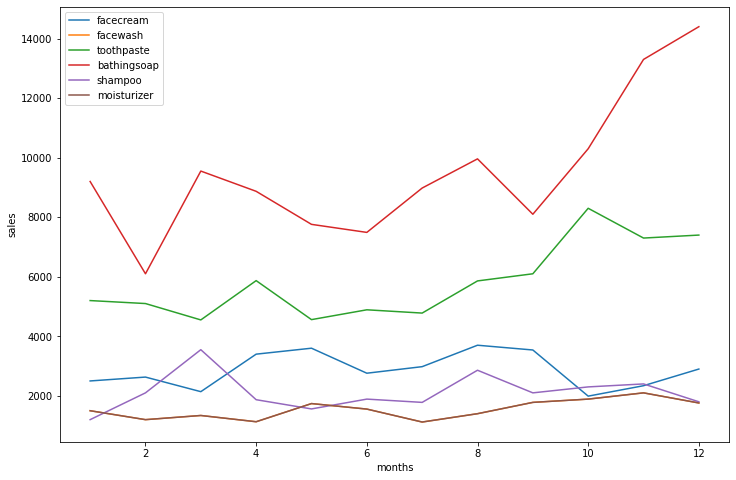

In [90]:
plt.figure(figsize=(12,8))
plt.plot(sales_data)
plt.legend(['facecream',
 'facewash',
 'toothpaste',
 'bathingsoap',
 'shampoo',
 'moisturizer'])
plt.ylabel('sales')
plt.xlabel('months')

9. Read toothpaste sales data of each month and show it using a scatter plot

Text(0.5, 0, 'months')

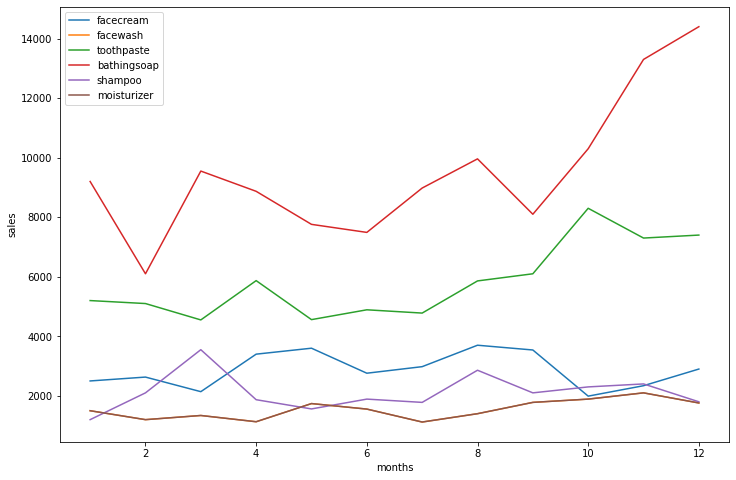

In [91]:
plt.figure(figsize=(12,8))
plt.plot(sales_data)
plt.legend(['facecream',
 'facewash',
 'toothpaste',
 'bathingsoap',
 'shampoo',
 'moisturizer'])
plt.ylabel('sales')
plt.xlabel('months')

10. Read face cream and face wash product sales data and show it using the bar chart

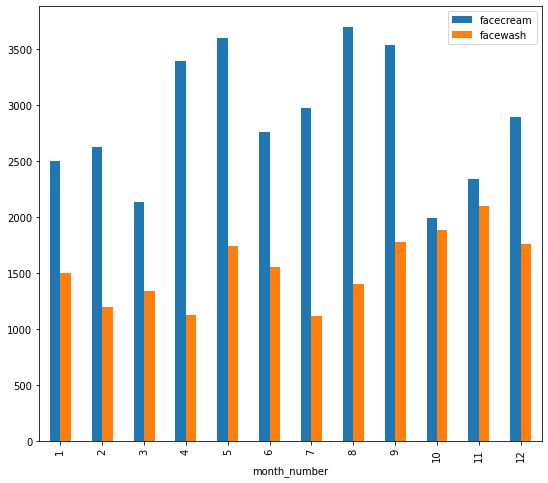

In [92]:
sales.plot(x='month_number',y=["facecream","facewash"],kind='bar',figsize=(9,8))

11. Read Bathing soap and face wash data of all months and display it using a Subplot

Text(0.5, 1.0, 'facewash')

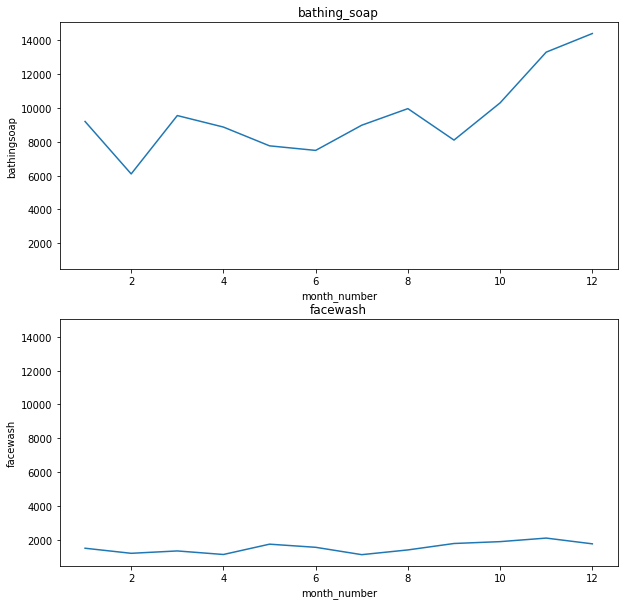

In [93]:
fig, axes = plt.subplots(2,1,figsize=(10,10),sharey=True)

sns.lineplot(ax=axes[0],x='month_number',y='bathingsoap',data=sales)
axes[0].set_title('bathing_soap')

sns.lineplot(ax=axes[1],x='month_number',y='facewash',data=sales)
axes[1].set_title('facewash')

12. Calculate total sale data for last year for each product and show it using a Pie chart

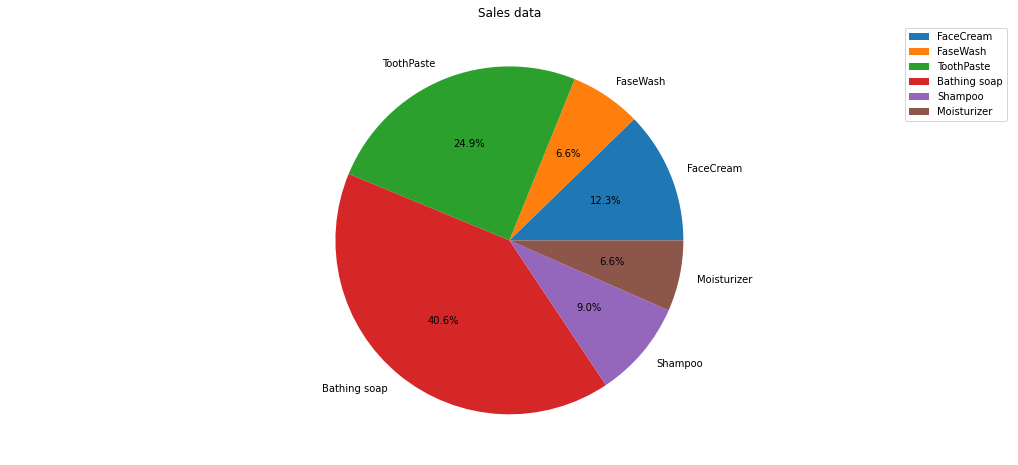

In [94]:
plt.figure(figsize=(18,8))
labels = ['FaceCream', 'FaseWash', 'ToothPaste', 'Bathing soap', 'Shampoo', 'Moisturizer']
salesData   = [sales['facecream'].sum(), sales['facewash'].sum(), sales['toothpaste'].sum(), 
         sales['bathingsoap'].sum(), sales['shampoo'].sum(), sales['moisturizer'].sum()]
plt.axis("equal")
plt.pie(salesData, labels=labels, autopct='%1.1f%%')
plt.legend()
plt.title('Sales data')
plt.show()